In [1]:
# Kaggle: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_train = pd.read_csv("train.csv")

In [4]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df_train.shape

(1460, 81)

In [6]:
# Hapus kolom "Id"
df_train = df_train.drop(["Id"], axis = 1)

In [7]:
df_train.shape

(1460, 80)

In [8]:
def summarize_features(df):
    # tipe data
    summary = pd.DataFrame(df.dtypes, columns = ['dtypes'])
    summary = summary.reset_index()
    
    # jumlah missing value
    summary['Missing'] = df.isnull().sum().values
    # jumlah unique value
    summary['Uniques'] = df.nunique().values
    
    return summary

summarize_features(df_train)

,index,dtypes,Missing,Uniques
0,MSSubClass,int64,0,15
1,MSZoning,object,0,5
2,LotFrontage,float64,259,110
3,LotArea,int64,0,1073
4,Street,object,0,2
...,...,...,...,...
75,MoSold,int64,0,12
76,YrSold,int64,0,5
77,SaleType,object,0,9
78,SaleCondition,object,0,6


In [9]:
train_set1 = df_train.iloc[:, np.r_[0:41, 79]]
train_set2 = df_train.iloc[:, 41:]

C:\Users\LENOVO\anaconda3.1\lib\site-packages\pandas\core\frame.py:4147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


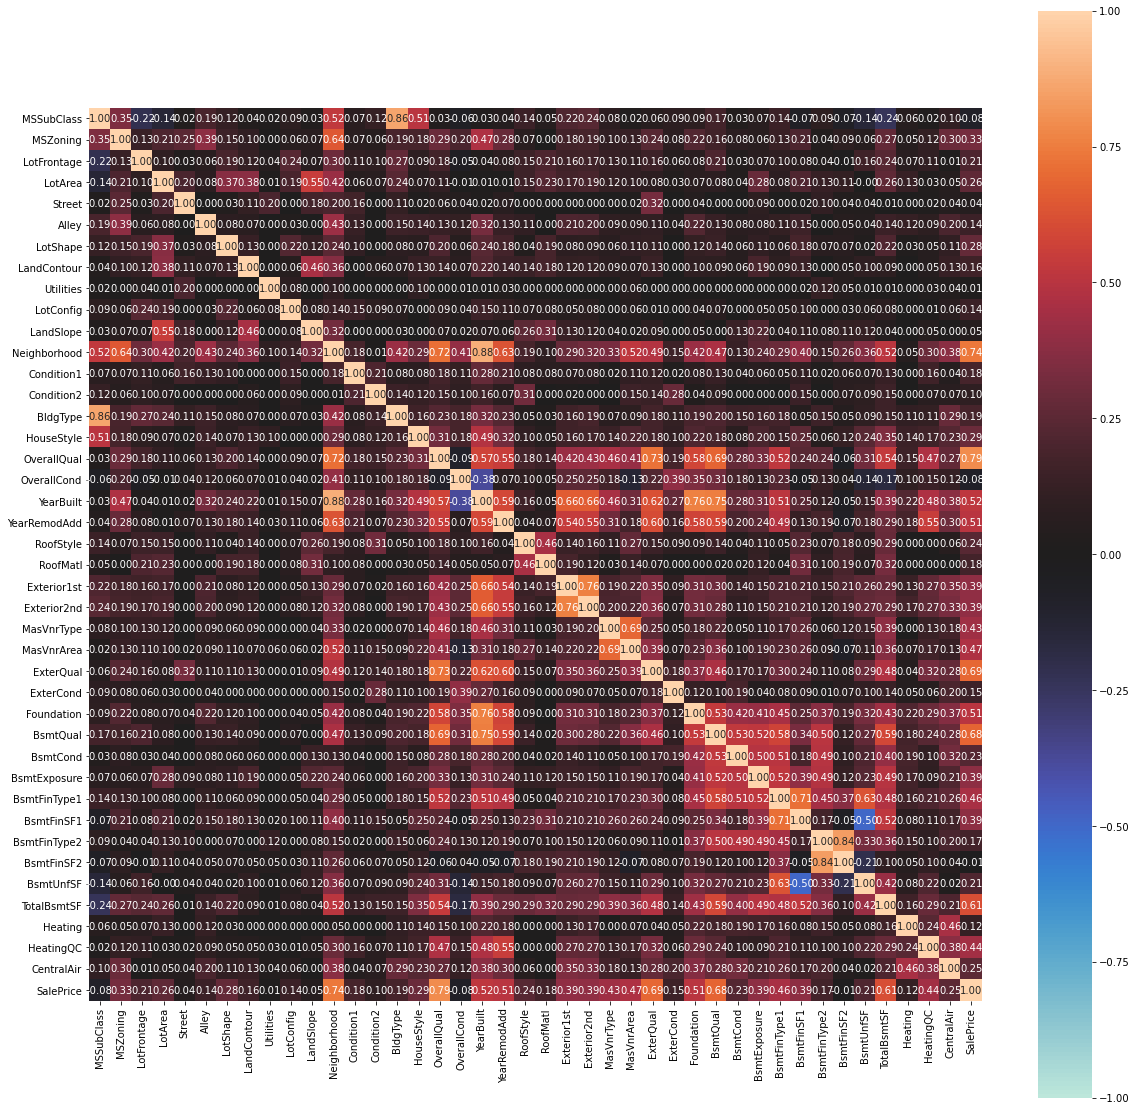

{'corr':               MSSubClass  MSZoning  LotFrontage   LotArea    Street     Alley  \
 MSSubClass      1.000000  0.349270    -0.215023 -0.139781  0.024969  0.188233   
 MSZoning        0.349270  1.000000     0.134045  0.205819  0.249384  0.388841   
 LotFrontage    -0.215023  0.134045     1.000000  0.100739  0.025107  0.064913   
 LotArea        -0.139781  0.205819     0.100739  1.000000  0.197131  0.084230   
 Street          0.024969  0.249384     0.025107  0.197131  1.000000  0.000000   
 Alley           0.188233  0.388841     0.064913  0.084230  0.000000  1.000000   
 LotShape        0.123571  0.152191     0.190091  0.371568  0.033770  0.079801   
 LandContour     0.037980  0.102102     0.124251  0.375869  0.113834  0.071435   
 Utilities       0.022844  0.000000     0.043535  0.010123  0.201306  0.000000   
 LotConfig       0.092940  0.063847     0.240192  0.191424  0.000000  0.034874   
 LandSlope       0.025672  0.071793     0.069958  0.550245  0.176221  0.000000   
 Neighbo

In [10]:
from dython import nominal
nominal.associations(train_set1, figsize = (20,20))

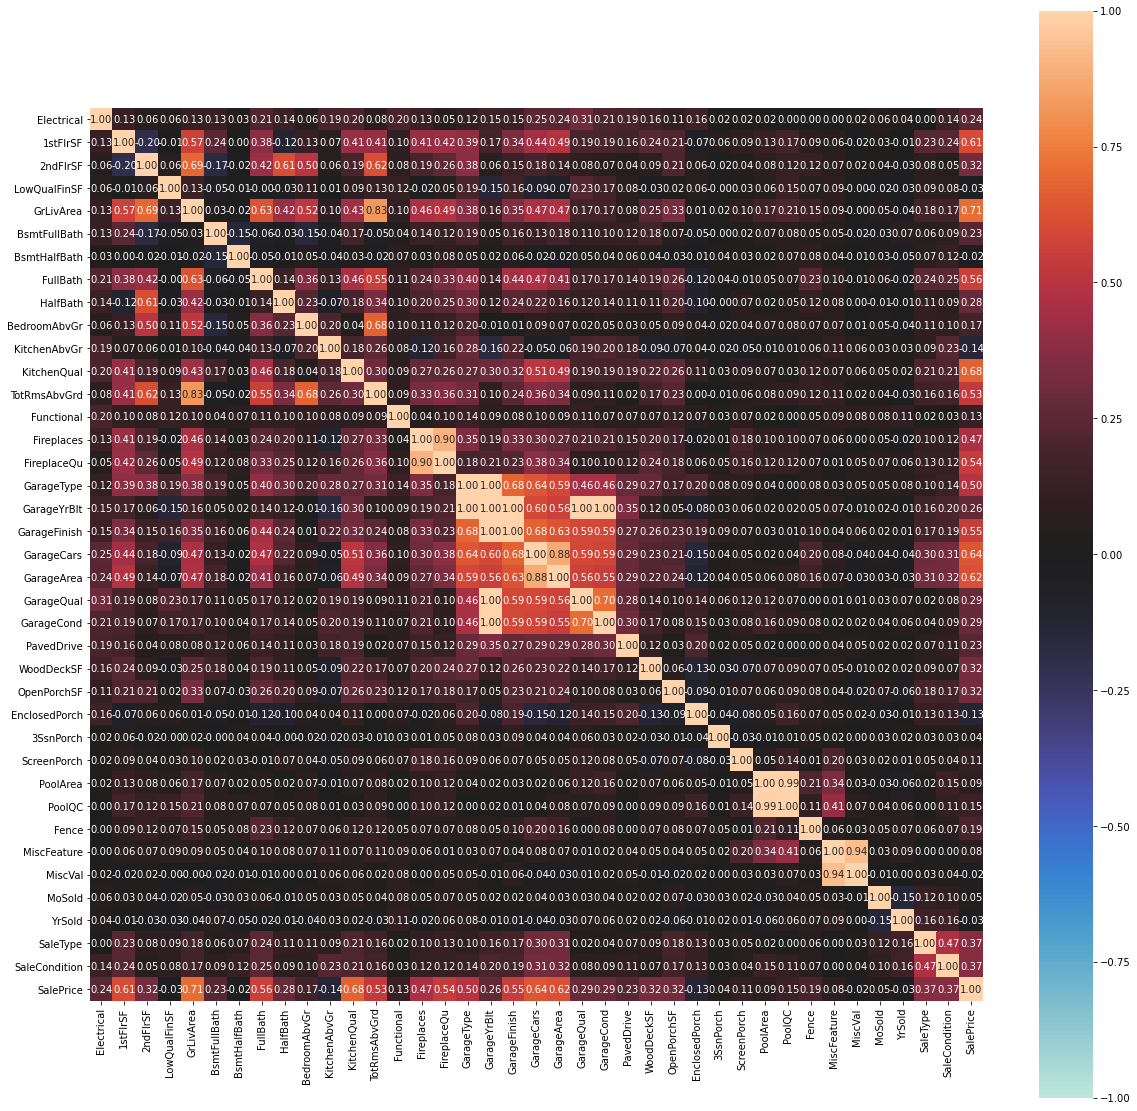

{'corr':                Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
 Electrical       1.000000  0.130057  0.057887      0.057057   0.131895   
 1stFlrSF         0.130057  1.000000 -0.202646     -0.014241   0.566024   
 2ndFlrSF         0.057887 -0.202646  1.000000      0.063353   0.687501   
 LowQualFinSF     0.057057 -0.014241  0.063353      1.000000   0.134683   
 GrLivArea        0.131895  0.566024  0.687501      0.134683   1.000000   
 BsmtFullBath     0.132198  0.244671 -0.169494     -0.047143   0.034836   
 BsmtHalfBath     0.025193  0.001956 -0.023855     -0.005842  -0.018918   
 FullBath         0.214464  0.380637  0.421378     -0.000710   0.630012   
 HalfBath         0.140330 -0.119916  0.609707     -0.027080   0.415772   
 BedroomAbvGr     0.055066  0.127401  0.502901      0.105607   0.521270   
 KitchenAbvGr     0.191095  0.068101  0.059306      0.007522   0.100063   
 KitchenQual      0.200720  0.412142  0.189310      0.093046   0.430917   
 TotRmsAbvGrd    

In [11]:
nominal.associations(train_set2, figsize = (20,20))

In [12]:
# >0,25 (YANG DIPAKAI)
# CentralAir, HeatingQC, TotalBsmtSF, BsmtFinSF1, BsmtFinType1, BsmtExposure, BsmtQual, Foundation, 
# ExterQual, MasVnrArea, MasVnrType, Exterior2nd, Exterior1st, YearRemodAdd, YearBuilt, OverallQual, 
# HouseStyle, Neighborhood, LotShape, LotArea, MSZoning, 
# SaleCondition, SaleType, OpenPorchSF, WoodDeckSF, GarageCond, GarageQual, GarageArea, GarageCars, 
# GarageFinish, GarageYrBit, GarageType, FireplaceQu, Fireplaces, TotRmsAbvGrd, KitchenQual, HalfBath,
# FullBath, GrLivArea, 2ndFlrSF, 1stFlrSF, SalePrice (target)

In [13]:
# >0,25
oke_train = df_train[["CentralAir", "HeatingQC", "TotalBsmtSF", "BsmtFinSF1", "BsmtFinType1", "BsmtExposure", "BsmtQual", "Foundation", 
                      "ExterQual", "MasVnrArea", "MasVnrType", "Exterior2nd", "Exterior1st", "YearRemodAdd", "YearBuilt", "OverallQual", 
                      "HouseStyle", "Neighborhood", "LotShape", "LotArea", "MSZoning", 
                      "SaleCondition", "SaleType", "OpenPorchSF", "WoodDeckSF", "GarageCond", "GarageQual", "GarageArea", "GarageCars", 
                      "GarageFinish", "GarageYrBlt", "GarageType", "FireplaceQu", "Fireplaces", "TotRmsAbvGrd", "KitchenQual", "HalfBath", 
                      "FullBath", "GrLivArea", "2ndFlrSF", "1stFlrSF", "SalePrice"]]

In [14]:
oke_train

,CentralAir,HeatingQC,TotalBsmtSF,BsmtFinSF1,BsmtFinType1,BsmtExposure,BsmtQual,Foundation,ExterQual,MasVnrArea,...,FireplaceQu,Fireplaces,TotRmsAbvGrd,KitchenQual,HalfBath,FullBath,GrLivArea,2ndFlrSF,1stFlrSF,SalePrice
0,Y,Ex,856,706,GLQ,No,Gd,PConc,Gd,196.0,...,NaN,0,8,Gd,1,2,1710,854,856,208500
1,Y,Ex,1262,978,ALQ,Gd,Gd,CBlock,TA,0.0,...,TA,1,6,TA,0,2,1262,0,1262,181500
2,Y,Ex,920,486,GLQ,Mn,Gd,PConc,Gd,162.0,...,TA,1,6,Gd,1,2,1786,866,920,223500
3,Y,Gd,756,216,ALQ,No,TA,BrkTil,TA,0.0,...,Gd,1,7,Gd,0,1,1717,756,961,140000
4,Y,Ex,1145,655,GLQ,Av,Gd,PConc,Gd,350.0,...,TA,1,9,Gd,1,2,2198,1053,1145,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,Y,Ex,953,0,Unf,No,Gd,PConc,TA,0.0,...,TA,1,7,TA,1,2,1647,694,953,175000
1456,Y,TA,1542,790,ALQ,No,Gd,CBlock,TA,119.0,...,TA,2,7,TA,0,2,2073,0,2073,210000
1457,Y,Ex,1152,275,GLQ,No,TA,Stone,Ex,0.0,...,Gd,2,9,Gd,0,2,2340,1152,1188,266500
1458,Y,Gd,1078,49,GLQ,Mn,TA,CBlock,TA,0.0,...,NaN,0,5,Gd,0,1,1078,0,1078,142125


In [15]:
summarize_features(oke_train)

,index,dtypes,Missing,Uniques
0,CentralAir,object,0,2
1,HeatingQC,object,0,5
2,TotalBsmtSF,int64,0,721
3,BsmtFinSF1,int64,0,637
4,BsmtFinType1,object,37,6
5,BsmtExposure,object,38,4
6,BsmtQual,object,37,4
7,Foundation,object,0,6
8,ExterQual,object,0,4
9,MasVnrArea,float64,8,327


In [16]:
# Hapus "FireplaceQu" karena missing-nya 690
oke_train = oke_train.drop(columns = ["FireplaceQu"])

In [17]:
summarize_features(oke_train)

,index,dtypes,Missing,Uniques
0,CentralAir,object,0,2
1,HeatingQC,object,0,5
2,TotalBsmtSF,int64,0,721
3,BsmtFinSF1,int64,0,637
4,BsmtFinType1,object,37,6
5,BsmtExposure,object,38,4
6,BsmtQual,object,37,4
7,Foundation,object,0,6
8,ExterQual,object,0,4
9,MasVnrArea,float64,8,327


### 1. Handling Missing Value

In [18]:
# MISSING

#BsmtFinType1 -> Ada missing, object
#BsmtExposure -> Ada missing, object
#BsmtQual -> Ada missing, object
#MasVnrArea -> Ada missing, float
#MasVnrType -> Ada missing, object
#GarageCond -> Ada missing, object
#GarageQual -> Ada missing, object
#GarageFinish -> Ada missing, object
#GarageYrBlt -> Ada missing, float
#GarageType -> Ada missing, object

#BsmtFinType1, BsmtExposure, BsmtQual, MasVnrArea, MasVnrType, GarageCond, GarageQual, GarageFinish, GarageYrBlt, GarageType

In [19]:
# HANDLING MISSING VALUE (CATEGORICAL DATA)
# Imputation with mode

oke_train["BsmtFinType1"] = oke_train["BsmtFinType1"].fillna(oke_train["BsmtFinType1"].value_counts().index[0])
oke_train["BsmtExposure"] = oke_train["BsmtExposure"].fillna(oke_train["BsmtExposure"].value_counts().index[0])
oke_train["BsmtQual"] = oke_train["BsmtQual"].fillna(oke_train["BsmtQual"].value_counts().index[0])
oke_train["MasVnrType"] = oke_train["MasVnrType"].fillna(oke_train["MasVnrType"].value_counts().index[0])
oke_train["GarageCond"] = oke_train["GarageCond"].fillna(oke_train["GarageCond"].value_counts().index[0])
oke_train["GarageQual"] = oke_train["GarageQual"].fillna(oke_train["GarageQual"].value_counts().index[0])
oke_train["GarageFinish"] = oke_train["GarageFinish"].fillna(oke_train["GarageFinish"].value_counts().index[0])
oke_train["GarageType"] = oke_train["GarageType"].fillna(oke_train["GarageType"].value_counts().index[0])

In [20]:
# HANDLING MISSING VALUE (NUMERICAL DATA)
# Imputation with mean

oke_train["MasVnrArea"].fillna(oke_train["MasVnrArea"].mean(), inplace=True)
oke_train["GarageYrBlt"].fillna(int(oke_train["GarageYrBlt"].mean()), inplace=True)

In [21]:
# Sudah tidak ada missing value
summarize_features(oke_train)

,index,dtypes,Missing,Uniques
0,CentralAir,object,0,2
1,HeatingQC,object,0,5
2,TotalBsmtSF,int64,0,721
3,BsmtFinSF1,int64,0,637
4,BsmtFinType1,object,0,6
5,BsmtExposure,object,0,4
6,BsmtQual,object,0,4
7,Foundation,object,0,6
8,ExterQual,object,0,4
9,MasVnrArea,float64,0,328


### 2. Handling Categorical Data

In [22]:
# VARIABEL KATEGORIK
var_kategorik = list(oke_train.dtypes[oke_train.dtypes == "object"].index)

var_kategorik

['CentralAir',
 'HeatingQC',
 'BsmtFinType1',
 'BsmtExposure',
 'BsmtQual',
 'Foundation',
 'ExterQual',
 'MasVnrType',
 'Exterior2nd',
 'Exterior1st',
 'HouseStyle',
 'Neighborhood',
 'LotShape',
 'MSZoning',
 'SaleCondition',
 'SaleType',
 'GarageCond',
 'GarageQual',
 'GarageFinish',
 'GarageType',
 'KitchenQual']

In [23]:
#!pip install category_encoders

In [24]:
var_kategorik

# ORDINAL
# HeatingQC, BsmtFinType1, BsmtExposure, BsmtQual, ExterQual
# GarageCond, GarageQual, KitchenQual

# NOMINAL
# CentralAir, Foundation, MasVnrType, Exterior2nd, Exterior1st, 
# HouseStyle, Neighborhood, LotShape, MSZoning, SaleCondition, 
# SaleType, GarageFinish, GarageType

['CentralAir',
 'HeatingQC',
 'BsmtFinType1',
 'BsmtExposure',
 'BsmtQual',
 'Foundation',
 'ExterQual',
 'MasVnrType',
 'Exterior2nd',
 'Exterior1st',
 'HouseStyle',
 'Neighborhood',
 'LotShape',
 'MSZoning',
 'SaleCondition',
 'SaleType',
 'GarageCond',
 'GarageQual',
 'GarageFinish',
 'GarageType',
 'KitchenQual']

In [25]:
#HeatingQC ->  Ex, Gd, TA, Fa, Po 
#BsmtFinType1 -> GLQ, ALQ, BLQ, Rec, LwQ, Unf, NA
#BsmtExposure -> Gd, Av, Mn, No, NA
#BsmtQual -> Ex, Gd, TA, Fa, Po, NA
#ExterQual -> Ex, Gd, TA, Fa, Po
#GarageCond -> Ex, Gd, TA, Fa, Po, NA
#GarageQual -> Ex, Gd, TA, Fa, Po, NA
#KitchenQual -> Ex, Gd, TA, Fa, Po

In [26]:
# Variabel Kategorik (ORDINAL)
# 1. YANG ISINYA SAMA

ordinal_cols1 = ["HeatingQC", "BsmtQual", "ExterQual", "GarageCond", "GarageQual", "KitchenQual"]

import category_encoders as ce

# create object of Ordinalencoding
def ordinal_sama(df):
    ordinal_cols1 = ["HeatingQC", "BsmtQual", "ExterQual", "GarageCond", "GarageQual", "KitchenQual"]
    for i in ordinal_cols1:
        encoder = ce.OrdinalEncoder(mapping = [{"col": i, 
                                                "mapping": {"NA": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}}])
        df[i] = encoder.fit_transform(df[i])
    return df[i]

ordinal_sama(oke_train)

0       4
1       3
2       4
3       4
4       4
       ..
1455    3
1456    3
1457    4
1458    4
1459    3
Name: KitchenQual, Length: 1460, dtype: int32

In [27]:
# Variabel Kategorik (ORDINAL)
# 2. YANG ISINYA BEDA

ordinal_cols2 = ["BsmtFinType1", "BsmtExposure"]

import category_encoders as ce

# 1. BsmtFinType1
# create object of Ordinalencoding
encoder_bsmty = ce.OrdinalEncoder(cols = ["BsmtFinType1"], return_df = True, 
                                  mapping = [{"col": "BsmtFinType1", 
                                              "mapping": {"NA": 0, "Unf": 1, "LwQ": 2, "Rec": 3, "BLQ": 4, "ALQ": 5, "GLQ": 6}}])
oke_train["BsmtFinType1"] = encoder_bsmty.fit_transform(oke_train["BsmtFinType1"])

# 2. BsmtExposure
# create object of Ordinalencoding
encoder_bsmex = ce.OrdinalEncoder(cols = ["BsmtExposure"], return_df = True, 
                                  mapping = [{"col": "BsmtExposure", 
                                              "mapping": {"NA": 0, "No": 1, "Mn": 2, "Av": 3, "Gd": 4}}])
oke_train["BsmtExposure"] = encoder_bsmex.fit_transform(oke_train["BsmtExposure"])

In [28]:
oke_train[ordinal_cols1 + ordinal_cols2]

,HeatingQC,BsmtQual,ExterQual,GarageCond,GarageQual,KitchenQual,BsmtFinType1,BsmtExposure
0,5,4,4,3,3,4,6,1
1,5,4,3,3,3,3,5,4
2,5,4,4,3,3,4,6,2
3,4,3,3,3,3,4,5,1
4,5,4,4,3,3,4,6,3
...,...,...,...,...,...,...,...,...
1455,5,4,3,3,3,3,1,1
1456,3,4,3,3,3,3,5,1
1457,5,3,5,3,3,4,6,1
1458,4,3,3,3,3,4,6,2


In [29]:
# Variabel Kategorik (NOMINAL)

import category_encoders as ce

nominal_cols = oke_train[["CentralAir", "Foundation", "MasVnrType", "Exterior2nd", "Exterior1st", 
                          "HouseStyle", "Neighborhood", "LotShape", "MSZoning", "SaleCondition", 
                          "SaleType", "GarageFinish", "GarageType"]]

In [30]:
#encode the data
encoded_nominal = pd.get_dummies(data = nominal_cols, drop_first = True)
encoded_nominal

,CentralAir_Y,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Exterior2nd_AsphShn,...,SaleType_New,SaleType_Oth,SaleType_WD,GarageFinish_RFn,GarageFinish_Unf,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd
0,1,0,1,0,0,0,1,0,0,0,...,0,0,1,1,0,1,0,0,0,0
1,1,1,0,0,0,0,0,1,0,0,...,0,0,1,1,0,1,0,0,0,0
2,1,0,1,0,0,0,1,0,0,0,...,0,0,1,1,0,1,0,0,0,0
3,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,1
4,1,0,1,0,0,0,1,0,0,0,...,0,0,1,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1,0,1,0,0,0,0,1,0,0,...,0,0,1,1,0,1,0,0,0,0
1456,1,1,0,0,0,0,0,0,1,0,...,0,0,1,0,1,1,0,0,0,0
1457,1,0,0,0,1,0,0,1,0,0,...,0,0,1,1,0,1,0,0,0,0
1458,1,1,0,0,0,0,0,1,0,0,...,0,0,1,0,1,1,0,0,0,0


In [31]:
oke_train = pd.concat(objs = [encoded_nominal, oke_train], axis = 1)
oke_train.drop(nominal_cols, axis = 1, inplace = True)

In [32]:
oke_train

,CentralAir_Y,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Exterior2nd_AsphShn,...,GarageYrBlt,Fireplaces,TotRmsAbvGrd,KitchenQual,HalfBath,FullBath,GrLivArea,2ndFlrSF,1stFlrSF,SalePrice
0,1,0,1,0,0,0,1,0,0,0,...,2003.0,0,8,4,1,2,1710,854,856,208500
1,1,1,0,0,0,0,0,1,0,0,...,1976.0,1,6,3,0,2,1262,0,1262,181500
2,1,0,1,0,0,0,1,0,0,0,...,2001.0,1,6,4,1,2,1786,866,920,223500
3,1,0,0,0,0,0,0,1,0,0,...,1998.0,1,7,4,0,1,1717,756,961,140000
4,1,0,1,0,0,0,1,0,0,0,...,2000.0,1,9,4,1,2,2198,1053,1145,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1,0,1,0,0,0,0,1,0,0,...,1999.0,1,7,3,1,2,1647,694,953,175000
1456,1,1,0,0,0,0,0,0,1,0,...,1978.0,2,7,3,0,2,2073,0,2073,210000
1457,1,0,0,0,1,0,0,1,0,0,...,1941.0,2,9,4,0,2,2340,1152,1188,266500
1458,1,1,0,0,0,0,0,1,0,0,...,1950.0,0,5,4,0,1,1078,0,1078,142125


In [33]:
summarize_features(oke_train)

,index,dtypes,Missing,Uniques
0,CentralAir_Y,uint8,0,2
1,Foundation_CBlock,uint8,0,2
2,Foundation_PConc,uint8,0,2
3,Foundation_Slab,uint8,0,2
4,Foundation_Stone,uint8,0,2
...,...,...,...,...
119,FullBath,int64,0,4
120,GrLivArea,int64,0,861
121,2ndFlrSF,int64,0,417
122,1stFlrSF,int64,0,753


### 3. Feature Scaling

In [34]:
oke_train.describe()

,CentralAir_Y,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Exterior2nd_AsphShn,...,GarageYrBlt,Fireplaces,TotRmsAbvGrd,KitchenQual,HalfBath,FullBath,GrLivArea,2ndFlrSF,1stFlrSF,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.934932,0.434247,0.443151,0.016438,0.004110,0.002055,0.304795,0.597260,0.087671,0.002055,...,1978.478082,0.613014,6.517808,3.511644,0.382877,1.565068,1515.463699,346.992466,1162.626712,180921.195890
std,0.246731,0.495827,0.496928,0.127198,0.063996,0.045299,0.460478,0.490617,0.282913,0.045299,...,23.994863,0.644666,1.625393,0.663760,0.502885,0.550916,525.480383,436.528436,386.587738,79442.502883
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1900.000000,0.000000,2.000000,2.000000,0.000000,0.000000,334.000000,0.000000,334.000000,34900.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1962.000000,0.000000,5.000000,3.000000,0.000000,1.000000,1129.500000,0.000000,882.000000,129975.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,1978.000000,1.000000,6.000000,3.000000,0.000000,2.000000,1464.000000,0.000000,1087.000000,163000.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,2001.000000,1.000000,7.000000,4.000000,1.000000,2.000000,1776.750000,728.000000,1391.250000,214000.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,2010.000000,3.000000,14.000000,5.000000,2.000000,3.000000,5642.000000,2065.000000,4692.000000,755000.000000


In [35]:
oke_train

,CentralAir_Y,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Exterior2nd_AsphShn,...,GarageYrBlt,Fireplaces,TotRmsAbvGrd,KitchenQual,HalfBath,FullBath,GrLivArea,2ndFlrSF,1stFlrSF,SalePrice
0,1,0,1,0,0,0,1,0,0,0,...,2003.0,0,8,4,1,2,1710,854,856,208500
1,1,1,0,0,0,0,0,1,0,0,...,1976.0,1,6,3,0,2,1262,0,1262,181500
2,1,0,1,0,0,0,1,0,0,0,...,2001.0,1,6,4,1,2,1786,866,920,223500
3,1,0,0,0,0,0,0,1,0,0,...,1998.0,1,7,4,0,1,1717,756,961,140000
4,1,0,1,0,0,0,1,0,0,0,...,2000.0,1,9,4,1,2,2198,1053,1145,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1,0,1,0,0,0,0,1,0,0,...,1999.0,1,7,3,1,2,1647,694,953,175000
1456,1,1,0,0,0,0,0,0,1,0,...,1978.0,2,7,3,0,2,2073,0,2073,210000
1457,1,0,0,0,1,0,0,1,0,0,...,1941.0,2,9,4,0,2,2340,1152,1188,266500
1458,1,1,0,0,0,0,0,1,0,0,...,1950.0,0,5,4,0,1,1078,0,1078,142125


In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
oke_train.iloc[:, :-1] = sc.fit_transform(oke_train.iloc[:, :-1])

In [37]:
oke_train.iloc[:, :-1]

,CentralAir_Y,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Exterior2nd_AsphShn,...,GarageCars,GarageYrBlt,Fireplaces,TotRmsAbvGrd,KitchenQual,HalfBath,FullBath,GrLivArea,2ndFlrSF,1stFlrSF
0,0.263813,-0.876102,1.120968,-0.129279,-0.064238,-0.045376,1.510265,-1.217782,-0.309994,-0.045376,...,0.311725,1.022315,-0.951226,0.912210,0.735994,1.227585,0.789741,0.370333,1.161852,-0.793434
1,0.263813,1.141420,-0.892086,-0.129279,-0.064238,-0.045376,-0.662136,0.821165,-0.309994,-0.045376,...,0.311725,-0.103311,0.600495,-0.318683,-0.771091,-0.761621,0.789741,-0.482512,-0.795163,0.257140
2,0.263813,-0.876102,1.120968,-0.129279,-0.064238,-0.045376,1.510265,-1.217782,-0.309994,-0.045376,...,0.311725,0.938936,0.600495,-0.318683,0.735994,1.227585,0.789741,0.515013,1.189351,-0.627826
3,0.263813,-0.876102,-0.892086,-0.129279,-0.064238,-0.045376,-0.662136,0.821165,-0.309994,-0.045376,...,1.650307,0.813866,0.600495,0.296763,0.735994,-0.761621,-1.026041,0.383659,0.937276,-0.521734
4,0.263813,-0.876102,1.120968,-0.129279,-0.064238,-0.045376,1.510265,-1.217782,-0.309994,-0.045376,...,1.650307,0.897246,0.600495,1.527656,0.735994,1.227585,0.789741,1.299326,1.617877,-0.045611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.263813,-0.876102,1.120968,-0.129279,-0.064238,-0.045376,-0.662136,0.821165,-0.309994,-0.045376,...,0.311725,0.855556,0.600495,0.296763,-0.771091,1.227585,0.789741,0.250402,0.795198,-0.542435
1456,0.263813,1.141420,-0.892086,-0.129279,-0.064238,-0.045376,-0.662136,-1.217782,3.225872,-0.045376,...,0.311725,-0.019931,2.152216,0.296763,-0.771091,-0.761621,0.789741,1.061367,-0.795163,2.355701
1457,0.263813,-0.876102,-0.892086,-0.129279,15.567059,-0.045376,-0.662136,0.821165,-0.309994,-0.045376,...,-1.026858,-1.562456,2.152216,1.527656,0.735994,-0.761621,0.789741,1.569647,1.844744,0.065656
1458,0.263813,1.141420,-0.892086,-0.129279,-0.064238,-0.045376,-0.662136,0.821165,-0.309994,-0.045376,...,-1.026858,-1.187247,-0.951226,-0.934130,0.735994,-0.761621,-1.026041,-0.832788,-0.795163,-0.218982


### 4. Target Engineering

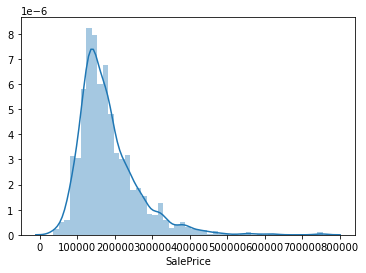

In [38]:
sns.distplot(oke_train["SalePrice"])

In [39]:
oke_train["SalePrice"] = np.log(oke_train["SalePrice"])

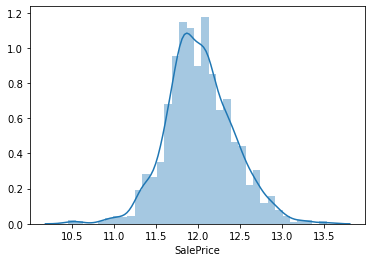

In [40]:
sns.distplot(oke_train["SalePrice"])

In [41]:
# SUDAH OKE, SIAP DIBUAT MODEL
oke_train

,CentralAir_Y,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Exterior2nd_AsphShn,...,GarageYrBlt,Fireplaces,TotRmsAbvGrd,KitchenQual,HalfBath,FullBath,GrLivArea,2ndFlrSF,1stFlrSF,SalePrice
0,0.263813,-0.876102,1.120968,-0.129279,-0.064238,-0.045376,1.510265,-1.217782,-0.309994,-0.045376,...,1.022315,-0.951226,0.912210,0.735994,1.227585,0.789741,0.370333,1.161852,-0.793434,12.247694
1,0.263813,1.141420,-0.892086,-0.129279,-0.064238,-0.045376,-0.662136,0.821165,-0.309994,-0.045376,...,-0.103311,0.600495,-0.318683,-0.771091,-0.761621,0.789741,-0.482512,-0.795163,0.257140,12.109011
2,0.263813,-0.876102,1.120968,-0.129279,-0.064238,-0.045376,1.510265,-1.217782,-0.309994,-0.045376,...,0.938936,0.600495,-0.318683,0.735994,1.227585,0.789741,0.515013,1.189351,-0.627826,12.317167
3,0.263813,-0.876102,-0.892086,-0.129279,-0.064238,-0.045376,-0.662136,0.821165,-0.309994,-0.045376,...,0.813866,0.600495,0.296763,0.735994,-0.761621,-1.026041,0.383659,0.937276,-0.521734,11.849398
4,0.263813,-0.876102,1.120968,-0.129279,-0.064238,-0.045376,1.510265,-1.217782,-0.309994,-0.045376,...,0.897246,0.600495,1.527656,0.735994,1.227585,0.789741,1.299326,1.617877,-0.045611,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.263813,-0.876102,1.120968,-0.129279,-0.064238,-0.045376,-0.662136,0.821165,-0.309994,-0.045376,...,0.855556,0.600495,0.296763,-0.771091,1.227585,0.789741,0.250402,0.795198,-0.542435,12.072541
1456,0.263813,1.141420,-0.892086,-0.129279,-0.064238,-0.045376,-0.662136,-1.217782,3.225872,-0.045376,...,-0.019931,2.152216,0.296763,-0.771091,-0.761621,0.789741,1.061367,-0.795163,2.355701,12.254863
1457,0.263813,-0.876102,-0.892086,-0.129279,15.567059,-0.045376,-0.662136,0.821165,-0.309994,-0.045376,...,-1.562456,2.152216,1.527656,0.735994,-0.761621,0.789741,1.569647,1.844744,0.065656,12.493130
1458,0.263813,1.141420,-0.892086,-0.129279,-0.064238,-0.045376,-0.662136,0.821165,-0.309994,-0.045376,...,-1.187247,-0.951226,-0.934130,0.735994,-0.761621,-1.026041,-0.832788,-0.795163,-0.218982,11.864462


### 5. Modelling

In [42]:
X = oke_train.iloc[:, :-1].values
y = oke_train.iloc[:, -1].values

In [43]:
# Splitting into the training set and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [44]:
# 1. RANDOM FOREST
from sklearn.ensemble import RandomForestRegressor
regressor1 = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor1.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [45]:
# Prediksi
y_pred1 = regressor1.predict(X_test)
np.set_printoptions(precision = 2)
print(np.concatenate((y_pred1.reshape(len(y_pred1), 1), y_test.reshape(len(y_test), 1)), 1))

[[12.3  12.21]
 [11.82 11.8 ]
 [11.66 11.61]
 [12.29 12.17]
 [11.42 11.39]
 [11.61 11.35]
 [12.43 12.55]
 [11.67 11.86]
 [13.11 13.52]
 [11.95 11.91]
 [12.21 12.25]
 [11.85 11.83]
 [12.31 12.32]
 [11.75 11.72]
 [11.75 11.69]
 [11.88 11.88]
 [12.31 12.15]
 [11.6  11.72]
 [11.82 11.91]
 [12.09 11.95]
 [11.79 12.02]
 [11.86 11.88]
 [11.51 11.61]
 [12.02 12.07]
 [12.1  12.13]
 [12.22 12.03]
 [12.03 12.09]
 [11.32 11.34]
 [12.68 12.68]
 [11.65 11.68]
 [11.79 11.61]
 [12.19 12.27]
 [11.85 11.96]
 [12.56 12.43]
 [12.65 12.83]
 [12.12 12.07]
 [12.52 12.53]
 [11.7  11.63]
 [12.36 12.48]
 [12.63 12.69]
 [12.21 12.4 ]
 [11.79 11.78]
 [12.11 12.01]
 [12.59 12.54]
 [12.67 12.91]
 [11.9  11.69]
 [11.71 11.74]
 [11.72 11.76]
 [12.   12.06]
 [11.53 11.35]
 [12.8  12.93]
 [11.89 11.96]
 [12.04 12.03]
 [11.42 11.51]
 [12.43 12.52]
 [11.62 11.72]
 [11.75 11.79]
 [12.38 12.39]
 [11.82 11.84]
 [11.58 11.65]
 [11.85 11.83]
 [11.78 11.81]
 [11.88 11.81]
 [11.94 12.1 ]
 [12.18 12.17]
 [11.99 11.96]
 [11.75 11

In [46]:
# Evaluasi Model
# RMSE dari data asli dan prediksi (masih dalam bentuk log)

from sklearn.metrics import mean_squared_error
import math

mse1 = mean_squared_error(y_test, y_pred1)
rmse1 = math.sqrt(mse1)

rmse1

0.1372040480904119

In [47]:
# Perbandingan Hasil Prediksi dan Data Asli (Bentuk yang Sebenarnya/Bukan Log)
print(np.concatenate((np.exp(y_pred1).reshape(len(y_pred1), 1), np.exp(y_test).reshape(len(y_test), 1)), 1))

[[219284.2  200624.  ]
 [136423.64 133000.  ]
 [116081.56 110000.  ]
 [217318.35 192000.  ]
 [ 91333.8   88000.  ]
 [110060.08  85000.  ]
 [250737.8  282922.  ]
 [117573.45 141000.  ]
 [492071.5  745000.  ]
 [154505.28 148800.  ]
 [200081.64 208900.  ]
 [139514.12 136905.  ]
 [221975.32 225000.  ]
 [126241.95 123000.  ]
 [126513.32 119200.  ]
 [144947.74 145000.  ]
 [221271.72 190000.  ]
 [109147.52 123600.  ]
 [135336.65 149350.  ]
 [177491.25 155000.  ]
 [132153.64 166000.  ]
 [141791.07 144500.  ]
 [ 99368.09 110000.  ]
 [165685.41 174000.  ]
 [179412.54 185000.  ]
 [203516.92 168000.  ]
 [167772.18 177500.  ]
 [ 82770.11  84500.  ]
 [320354.83 320000.  ]
 [114140.36 118500.  ]
 [131546.18 110000.  ]
 [196954.45 213000.  ]
 [140349.14 156000.  ]
 [283874.5  250000.  ]
 [312596.56 372500.  ]
 [183326.92 175000.  ]
 [273211.33 277500.  ]
 [121011.66 112500.  ]
 [232316.46 263000.  ]
 [307077.6  325000.  ]
 [201144.3  243000.  ]
 [132177.22 130000.  ]
 [182136.65 164990.  ]
 [294159.95